Download the dataset from the link below:
    https://www.kaggle.com/rakannimer/air-passenger-prediction

#### Importing the libraries

In [1]:
#import numpy 
import numpy as np
#import pandas
import pandas as pd
#import visualization library
import matplotlib.pyplot as plt

#### importing the dataset

In [1]:
#read the dataset
data=pd.read_csv(r'E:\Guided Projects\Forecast commuters inflow for airline industry using Prophet\Dataset\air_passenger.csv')

NameError: name 'pd' is not defined

In [ ]:
#check the first 5 rows of data
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
#checking the shape of data
data.shape

(144, 2)

#### Taking care of Missing data

In [4]:
#checking the null values
data.isnull().any()

NameError: name 'data' is not defined

In [ ]:
#rename the #passengers column name
data.rename(columns={"#Passengers": "Passengers"},inplace=True)

In [10]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


#### Data Visualization

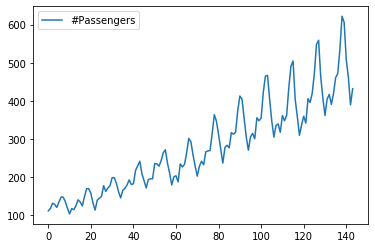

In [11]:
#We can plot the data easily in Pandas by calling the plot() function on the DataFrame.
import matplotlib.pyplot as plt
data.plot()
plt.show()

In [12]:
data['Month']=pd.to_datetime(data['Month'], format='%Y-%m')

In [13]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [14]:
data.shape

(144, 2)

#### Forecast airline passengers traffic flow With Prophet

In [15]:
#import datetime conversion
from pandas import to_datetime
#prepare expected column names
data.columns = ['ds', 'y']
data['ds']= to_datetime(data['ds'])

In [16]:
data.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


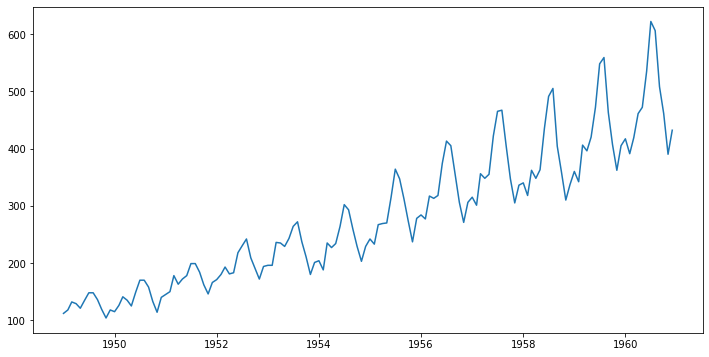

In [15]:
#visualizing the ds column
#configure the figure size
plt.figure(figsize=(12,6))
plt.plot(data.set_index(['ds']))

#### Model Building

In [16]:
#fit prophet model on the dataset

#import Prophet library from fbprophet
from fbprophet import Prophet
# define the model
model = Prophet()
# fit the model
model.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\DELL\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



#### Prediction

In [17]:
future_prediction = model.make_future_dataframe(periods=365,freq="D")
future_prediction.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


#### Obtaining the forecastes

In [18]:
forecast=model.predict(future_prediction)

In [19]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.583811,56.388286,116.039100,106.583811,106.583811,-21.946575,-21.946575,-21.946575,-21.946575,-21.946575,-21.946575,0.0,0.0,0.0,84.637236
1,1949-02-01,108.760063,46.584166,106.739811,108.760063,108.760063,-30.707281,-30.707281,-30.707281,-30.707281,-30.707281,-30.707281,0.0,0.0,0.0,78.052782
2,1949-03-01,110.725710,81.460251,138.822128,110.725710,110.725710,-0.469476,-0.469476,-0.469476,-0.469476,-0.469476,-0.469476,0.0,0.0,0.0,110.256234
3,1949-04-01,112.901962,77.255958,134.697041,112.901962,112.901962,-5.166670,-5.166670,-5.166670,-5.166670,-5.166670,-5.166670,0.0,0.0,0.0,107.735292
4,1949-05-01,115.008012,81.785258,140.895377,115.008012,115.008012,-3.765920,-3.765920,-3.765920,-3.765920,-3.765920,-3.765920,0.0,0.0,0.0,111.242092


#### summarize the forecast

In [20]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds        yhat  yhat_lower  yhat_upper
0 1949-01-01   84.637236   56.388286  116.039100
1 1949-02-01   78.052782   46.584166  106.739811
2 1949-03-01  110.256234   81.460251  138.822128
3 1949-04-01  107.735292   77.255958  134.697041
4 1949-05-01  111.242092   81.785258  140.895377


#### plot forecast

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



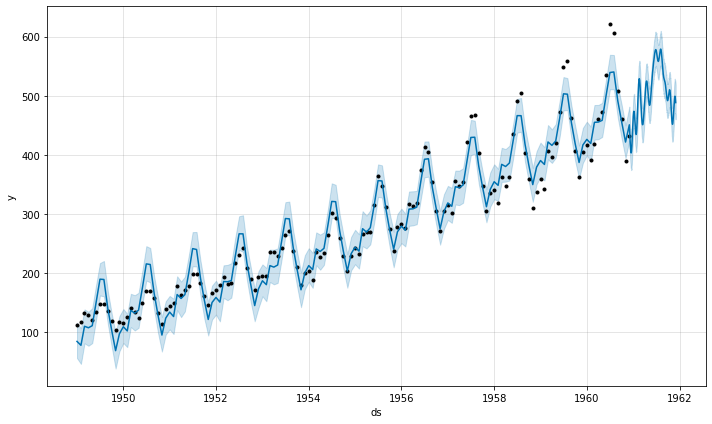

In [21]:
model.plot(forecast)
plt.show()

#### plotting the forecast components

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



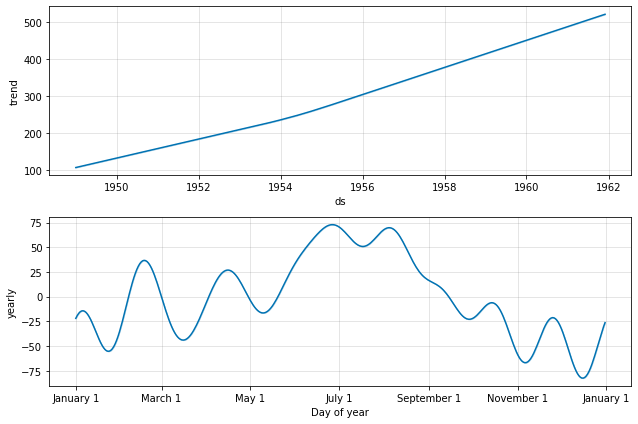

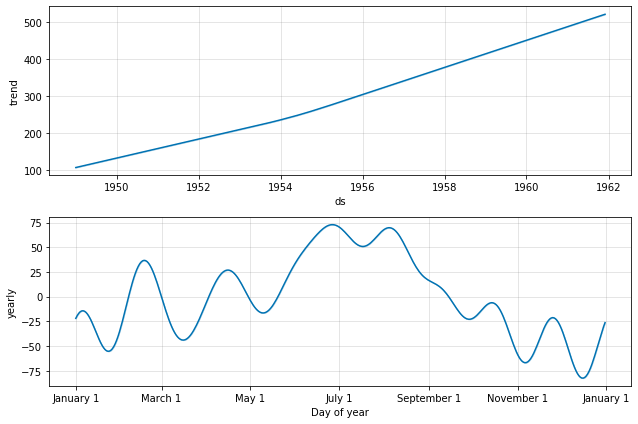

In [22]:
model.plot_components(forecast)

#### Cross Validation

In [23]:
from fbprophet.diagnostics import cross_validation

In [24]:
cv = cross_validation(model,initial = '530 days',period='180 days',horizon = '365 days')
cv

INFO:fbprophet:Making 20 forecasts with cutoffs between 1950-07-22 00:00:00 and 1959-12-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
C:\Users\DELL\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
C:\Users\DELL\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
C:\Users\DELL\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, i

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1950-08-01,140.641291,140.307640,141.096900,170,1950-07-22
1,1950-09-01,135.680617,134.488882,137.165177,158,1950-07-22
2,1950-10-01,142.185821,139.773057,144.928464,133,1950-07-22
3,1950-11-01,111.857285,107.946898,116.107752,114,1950-07-22
4,1950-12-01,133.389899,127.942138,139.607419,140,1950-07-22
...,...,...,...,...,...,...
235,1960-08-01,527.169942,499.876997,553.144717,606,1959-12-02
236,1960-09-01,485.991283,461.162216,513.122845,508,1959-12-02
237,1960-10-01,452.282405,427.946448,479.763615,461,1959-12-02
238,1960-11-01,422.463836,396.374532,448.162649,390,1959-12-02


#### Evaluation of Model

In [25]:
from fbprophet.diagnostics import performance_metrics
pm=performance_metrics(cv)
pm.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,41 days,1055.033727,32.481283,25.942609,0.085472,0.085211,0.208333
1,42 days,986.797269,31.413329,25.336341,0.083870,0.085211,0.166667
2,46 days,1011.745056,31.807940,26.198913,0.084966,0.085498,0.125000
3,47 days,983.161004,31.355398,25.952650,0.083727,0.085498,0.125000
4,48 days,980.343025,31.310430,25.685780,0.081820,0.085498,0.166667


#### Visualizing the performance Metrics

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



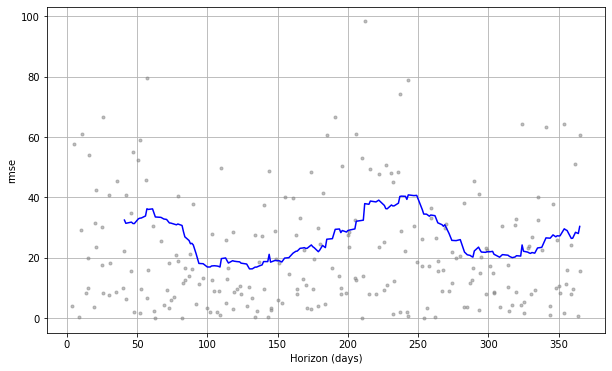

In [26]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv,metric='rmse')

#### Save the Model

In [ ]:
#import pickle
import pickle
pickle.dump(model,open('airpassengers.pkl','wb'))